### Importing the required libraries

In [1]:
#data manipulation library
import numpy as np
import pandas as pd

#data vizualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#model building libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

### Importing the data

In [2]:
#importing train and test data
train = pd.read_csv('/content/drive/MyDrive/Data Science/bigmart regression/archive (1).zip (Unzipped Files)/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science/bigmart regression/archive (1).zip (Unzipped Files)/Test.csv')

In [3]:
#checking if the data has beein imported
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Data sanity checks

In [5]:
#checking the shape of the train dataset
train.shape

(8523, 12)

In [6]:
#printing the  columns on the train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
#checking the shape of the test dataset
test.shape

(5681, 11)

In [8]:
#printing the columns on the test data
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### concatinating the datasets to perform EDA

In [9]:
#copying the dataset
train1 = train.copy()
test1 = test.copy()

#concatinating the dataset
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train,test], ignore_index = True)
df.shape

(14204, 13)

In [10]:
# numerical data summery
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
# checking missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

### Dealing with object datatypes

In [13]:
# checking the categories found in Item_Fat_Content 
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
# checking the categories found in Item_Visibility 
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [15]:
# checking the categories found in Outlet_Identifier 
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
# checking the categories found in Outlet_Size 
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
# checking the categories found in Outlet_Location_Type 
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [18]:
# checking the categories found in Outlet_Type 
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### calculating the outlet age

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [20]:
#getting the year of establishment
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

**Calculating the age of the establishments**

In [21]:
# calculations of the age of establishments
df['outlet_age'] = 2023 - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


**Checking unique values in outlet size**

In [22]:
#unique vales in outlet size
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

**printing the value counts of columns**

In [23]:
#getting the columns
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'outlet_age'],
      dtype='object')

In [24]:
#printing the value counts
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [25]:
#printing the value counts
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

**Getting the most occuring value in outlet size**

In [26]:
# using mode to get the most occuring value in outlet size
df['Outlet_Size'].mode()[0]

'Medium'

- medium is the most occuring value

In [27]:
# replacing the missing values with the most occuring value
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size']).mode()[0]

#replacing values of item_weight with mean weight
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight']).mean()

**Detecting outliers**

In [28]:
#calculating the first and second quantile of item visibility
Q1 = df['Item_Visibility'].quantile(0.25)
#calculating the second quantile
Q3 = df['Item_Visibility'].quantile(0.75)

In [29]:
#calculating the IQR
IQR = Q3 - Q1

In [30]:
#removing the outliers
fill_data = df.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

**Checking the shape of the dataset without outliers**

In [31]:
#getting the shape of the dataset
fill_data.shape

(13943, 14)

**Shape of data with outliers**

In [32]:
df.shape

(14204, 14)

**Assigning the fill dataframe to df dataframe**

In [33]:
#assigning of dataframes
df = fill_data
#confirming assignation
df.shape

(13943, 14)

**Dealing with item vizibility column**

In [34]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [35]:
#converting numerical column to categorical column
df['item_vis'] = pd.cut(df['Item_Visibility'], [0.00, 0.065, 0.13,0.2], labels = ['low viz', 'viz', 'high viz'])

<ipython-input-35-1b5447c228b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_vis'] = pd.cut(df['Item_Visibility'], [0.00, 0.065, 0.13,0.2], labels = ['low viz', 'viz', 'high viz'])


In [36]:
#getting the value counts of item vis
df['item_vis'].value_counts()

low viz     7363
viz         4283
high viz    1418
Name: item_vis, dtype: int64

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age,item_vis
0,FDA15,12.792854,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,low viz
1,DRC01,12.792854,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,low viz
2,FDN15,12.792854,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,low viz
3,FDX07,12.792854,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,NaN
4,NCD19,12.792854,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052,train,36,NaN


In [38]:
# Check data type and unique values in the 'item_vis' column
print(df['item_vis'].dtype)
print(df['item_vis'].unique())


category
['low viz', NaN, 'viz', 'high viz']
Categories (3, object): ['low viz' < 'viz' < 'high viz']


In [39]:
# Replace NaN values with 'low viz' in the 'item_vis' column
df.loc[df['item_vis'].isna(), 'item_vis'] = 'low viz'

# Print the first few rows of the 'item_vis' column
print(df['item_vis'].head())

0    low viz
1    low viz
2    low viz
3    low viz
4    low viz
Name: item_vis, dtype: category
Categories (3, object): ['low viz' < 'viz' < 'high viz']


**Dealing with item fat content column**

In [40]:
#printing unique values of this column
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [41]:
# replacing the Low fat,LF and low fat values with Low Fat
df.loc[df['Item_Fat_Content'].isin(['low fat', 'LF']), 'Item_Fat_Content'] = 'Low Fat'

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [42]:
# replacing the reg and Regular values with Regular
df.loc[df['Item_Fat_Content'].isin(['Regular']), 'Item_Fat_Content'] = 'reg'

df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg'], dtype=object)

**Transforming categorical variables to numeric variables**

In [43]:
# initializing the label ecoder
lbe = LabelEncoder()

In [44]:
#dealing with item fat content column
df.loc[:, 'Item_Fat_Content'] = lbe.fit_transform(df.loc[:, 'Item_Fat_Content'])
df.head()


<ipython-input-44-d191ea46156b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Item_Fat_Content'] = lbe.fit_transform(df.loc[:, 'Item_Fat_Content'])
<ipython-input-44-d191ea46156b>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Item_Fat_Content'] = lbe.fit_transform(df.loc[:, 'Item_Fat_Content'])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age,item_vis
0,FDA15,12.792854,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,low viz
1,DRC01,12.792854,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,low viz
2,FDN15,12.792854,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,low viz
3,FDX07,12.792854,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,low viz
4,NCD19,12.792854,0,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052,train,36,low viz


In [45]:
#dealing with item_vis column
df.loc[:, 'item_vis'] = lbe.fit_transform(df.loc[:, 'item_vis'])
df.head()


<ipython-input-45-a908fdbe5e19>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'item_vis'] = lbe.fit_transform(df.loc[:, 'item_vis'])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age,item_vis
0,FDA15,12.792854,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,1
1,DRC01,12.792854,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,1
2,FDN15,12.792854,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,1
3,FDX07,12.792854,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,1
4,NCD19,12.792854,0,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052,train,36,1


**working on column item identifier**

In [46]:
#getting the value counts of the column
df['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [47]:
#reducing categories by mapping them
df['Item_type_combined']= df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_type_combined'] = df['Item_type_combined'].map({
    'FD' : 'FOOD',
    'NC' : 'NON_CONSUMABLE',
    'DR' : 'DRINK'
})

In [48]:
#checking the value counts
df['Item_type_combined'].value_counts()

FOOD              9991
NON_CONSUMABLE    2652
DRINK             1300
Name: Item_type_combined, dtype: int64

**Dealing with categorical variables**

In [49]:
#using one hot encoding to change categorical variables to numbers
df2 = df.copy()
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age,item_vis,Item_type_combined
0,FDA15,12.792854,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,1,FOOD
1,DRC01,12.792854,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,1,DRINK
2,FDN15,12.792854,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,1,FOOD
3,FDX07,12.792854,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,1,FOOD
4,NCD19,12.792854,0,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052,train,36,1,NON_CONSUMABLE


In [50]:
#getting dummy variables from categorical columns
df2 = pd.get_dummies(df2, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type', 'Item_type_combined'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13943 entries, 0 to 14203
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    13943 non-null  object 
 1   Item_Weight                        13943 non-null  float64
 2   Item_Visibility                    13943 non-null  float64
 3   Item_Type                          13943 non-null  object 
 4   Item_MRP                           13943 non-null  float64
 5   Outlet_Identifier                  13943 non-null  object 
 6   Outlet_Establishment_Year          13943 non-null  int64  
 7   Item_Outlet_Sales                  8375 non-null   float64
 8   source                             13943 non-null  object 
 9   outlet_age                         13943 non-null  int64  
 10  item_vis                           13943 non-null  int64  
 11  Item_Fat_Content_0                 13943 non-null  uin

**Handling the missing values in Item Outlet sales column**

In [51]:
#getting the missing values
df2['Item_Outlet_Sales'].isnull().sum()

5568

In [52]:
# using mode to get the most occuring value in Item_Outlet_Sales
df2['Item_Outlet_Sales'].mode()

0    958.752
Name: Item_Outlet_Sales, dtype: float64

In [53]:
#getting the median of the column
df2['Item_Outlet_Sales'].median()

1830.95

In [54]:
#getting the mean of the column
df2['Item_Outlet_Sales'].mean()

2213.8448623761196

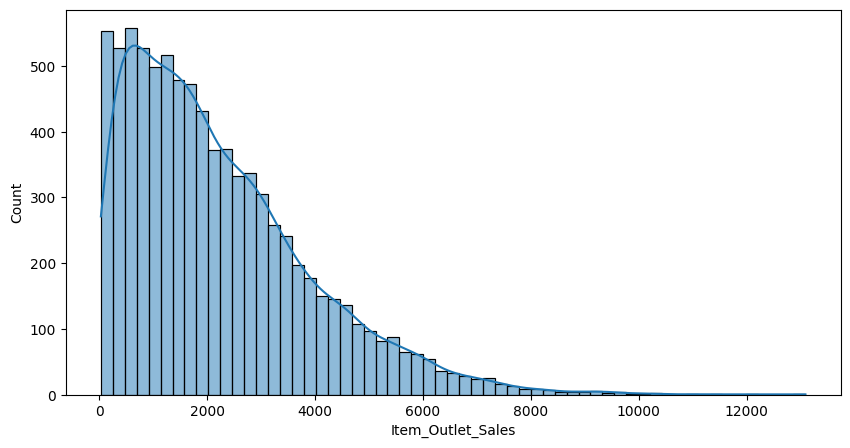

In [55]:
#plotting the column to see its distribution
plt.figure(figsize = (10,5))
sns.histplot(df, x = 'Item_Outlet_Sales', kde = True)
plt.show()

In [56]:
#The data is skewed so we use median to replace the missing values
#getting the median of the column
median = df2['Item_Outlet_Sales'].median()

#replacing the missing values with the median
df2['Item_Outlet_Sales'].fillna(median, inplace = True)
df2['Item_Outlet_Sales'].isnull().sum()


0

**Dividing the dataset into train and test data**

In [57]:

# dividing data into train and test
train = df2.loc[df2['source'] == 'train']
test = df2.loc[df2['source'] == 'test']

#dropping unecessary columns
train = train.drop(['source'], axis = 1)
test = test.drop(['Item_Outlet_Sales', 'source'], axis = 1)

#exporting the modified versions to csv
train.to_csv('train_mod.csv', index = False)
test.to_csv('test_mod.csv', index = False)

In [58]:
#reading the data
train2 = pd.read_csv('train_mod.csv')
test2 = pd.read_csv('test_mod.csv')

In [59]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_age,item_vis,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_type_combined_DRINK,Item_type_combined_FOOD,Item_type_combined_NON_CONSUMABLE
0,FDA15,12.792854,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,24,1,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,12.792854,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,14,1,...,0,1,1,0,0,1,0,1,0,0
2,FDN15,12.792854,0.016760,Meat,141.6180,OUT049,1999,2097.2700,24,1,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,12.792854,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,25,1,...,0,1,1,1,0,0,0,0,1,0
4,NCD19,12.792854,0.000000,Household,53.8614,OUT013,1987,994.7052,36,1,...,0,1,1,0,1,0,0,0,0,1


In [60]:
#checking the datatypes of the  train set
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
outlet_age                             int64
item_vis                               int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_Tier 1            int64
Outlet_Location_Type_Tier 2            int64
Outlet_Location_Type_Tier 3            int64
Outlet_Size_Medium                     int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_type_combined_DRINK               int64
Item_type_combined_FOOD                int64
Item_type_

In [61]:
#defining the dependent and independent variable
x = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier','Item_Type'], axis =1)
y= train2.pop('Item_Outlet_Sales')

In [62]:
xtest = test2.drop(['Outlet_Identifier', 'Item_Identifier', 'Item_Type'], axis =1)
xtest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,outlet_age,item_vis,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_type_combined_DRINK,Item_type_combined_FOOD,Item_type_combined_NON_CONSUMABLE
0,12.792854,0.007565,107.8622,1999,24,1,1,0,1,0,0,1,0,1,0,0,0,1,0
1,12.792854,0.038428,87.3198,2007,16,1,0,1,0,1,0,1,0,1,0,0,0,1,0
2,12.792854,0.099575,241.7538,1998,25,2,1,0,0,0,1,1,1,0,0,0,0,0,1
3,12.792854,0.015388,155.0340,2007,16,1,1,0,0,1,0,1,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,1985,38,2,0,1,0,0,1,1,0,0,0,1,0,1,0


**Splitting data into train and test sets**

In [63]:
#splitting data to train and test subset
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


**Building the linear regression model**

In [64]:
#defining a model
ln = LinearRegression()

#fitting a model
ln.fit(x_train, y_train)

LinearRegression()

In [65]:
#printing the coefficient and intercept of the line
print(ln.coef_)
print(ln.intercept_)

[ 6.46646771e-16 -3.16751796e+02  1.58773294e+01 -7.98612957e-01
  7.98612957e-01 -1.41574578e+01 -1.04188003e+00  1.04188003e+00
 -1.36795264e+01  3.62243229e+01 -2.25447965e+01  0.00000000e+00
 -1.71337152e+03  2.33076694e+02 -8.69547745e+01  1.56724960e+03
  9.18113707e+00  3.50188472e+01 -4.41999843e+01]
1448.1875658194758


**Making predictions on the test set**

In [66]:
#predicting on the test data
pred = ln.predict(x_test)
print(pred)

[2069.88808859 3704.87232941 2908.23317944 ... 3541.15407058 3451.6968156
 1273.88759124]


**Getting the rmse of a model**

In [67]:
#importing math library
import math

#finding the rmse
print(math.sqrt(mean_squared_error(y_test, pred)))

1127.6175432415841


**Getting the R_Squared of the model**

In [68]:
#getting the rsquared of the model
rsquared = ln.score(x_test,y_test)
rsquared

0.5632877225454769

**Using a different model**

In [69]:
#using randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rn = RandomForestRegressor()

**Fitting the model**

In [70]:
#fitting the training and testing set
rn.fit(x_train, y_train)

RandomForestRegressor()

**getting the score of the model**

In [71]:
#getting the rsquared of the model
r_score = rn.score(x_test, y_test)
r_score

0.5534880388122345

**Using voting regressor to get a higher performance**

In [72]:
#importing the library
from sklearn.ensemble import VotingRegressor

In [73]:
# Creating three linear regression models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()


In [74]:
#training the models on the training set
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)


LinearRegression()

**Using voting regressor**

In [75]:
#using a voting regressor
voting_regressor = VotingRegressor(estimators=[('model1', model1), ('model2', model2), ('model3', model3)])


In [76]:
# Train the voting regressor on the training set
voting_regressor.fit(x_train, y_train)

# Evaluate the voting regressor on the test set
score = voting_regressor.score(x_test, y_test)
print('Score:', score)

Score: 0.5632877225454769


- The models still have a lower r-squared score. Tryin a neural network to see if it gives a higher score

**Using a neural network**

In [77]:
#importing tensorflow
import tensorflow as tf

#defining the model
dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1)

])

**Compiling the model**

In [78]:
dnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss= 'mse', metrics =['mae'])

**fitting the model**

In [79]:
#fitting the model
history = dnn.fit(x_train, y_train, epochs = 10, batch_size= 50, validation_data=(x_test, y_test))

Epoch 1/10
118/118 [==============================] - 3s 8ms/step - loss: 2637510.7500 - mae: 1252.5238 - val_loss: 2210525.0000 - val_mae: 1129.1541
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 1988919.7500 - mae: 1045.3792 - val_loss: 1957023.5000 - val_mae: 1001.4176
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 1920330.5000 - mae: 1022.8109 - val_loss: 1928917.3750 - val_mae: 994.0734
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 1907436.3750 - mae: 1017.1240 - val_loss: 1917485.8750 - val_mae: 1008.4389
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 1885619.5000 - mae: 1015.6221 - val_loss: 1873087.2500 - val_mae: 982.7953
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 1846667.1250 - mae: 1003.7618 - val_loss: 1864802.0000 - val_mae: 979.6856
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 1860741.5000 - mae: 1010.5487

**Getting the r_squared of the model**

In [80]:
import sklearn.metrics as metrics

# make predictions on x_train
y_pred = dnn.predict(x_train)

# calculate R-squared value
r_squared = metrics.r2_score(y_train, y_pred)

print("R-squared value:", r_squared)

184/184 [==============================] - 1s 3ms/step
R-squared value: 0.3914852487164082


**predicting column Item_Outlet_sales on the test data**

In [82]:
#predicting the column on the test data
sales_pred = voting_regressor.predict(xtest)
print(sales_pred)

[1820.31115577 1523.58664607 1869.91528852 ... 1923.92683269 3556.97446873
 1376.95920672]
